In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=POVSTENKO;'
                      'Database=WH_Person;'
                      'Trusted_Connection=yes;')

In [3]:
sql_query = pd.read_sql_query('''
                              SELECT a.City, a.StateProvinceName as State, a.CountryRegionName as Country, a.PostalCode, p.Sex, p.EmailPromotion, p.EmailAddress,  
                  p.PhoneNumberType, s.OnlineOrderFlag, s.OrderQty, s.UnitPrice, s.SubTotal, s.TaxAmt, s.Freight, s.TotalDue, s.ShipMethod, s.ShipBase, s.ShipRate, d.FullDate 
FROM     Facts AS f INNER JOIN
                  AddressDim AS a ON f.AddressID = a.AddressID INNER JOIN
                  PersonDim AS p ON f.PersonID = p.BusinessEntityID INNER JOIN
                  SalesOrderDim AS s ON f.SalesOrderID = s.SalesOrderID INNER JOIN
                  DateDim AS d ON f.DateID = d.DateID
                              '''
                              ,conn)

df = pd.DataFrame(sql_query)
df.to_csv('person.csv', index = False)

In [10]:
data = pd.read_csv('person.csv', parse_dates=['FullDate'], low_memory=False)
print(data.shape)
data.head()

(16481, 20)


,City,State,Country,CountryCode,PostalCode,Sex,EmailPromotion,EmailAddress,PhoneNumberType,OnlineOrderFlag,OrderQty,UnitPrice,SubTotal,TaxAmt,Freight,TotalDue,ShipMethod,ShipBase,ShipRate,FullDate
0,Warrnambool,Victoria,Australia,AU,3280,NaN,0,victoria15@adventure-works.com,Home,-1,1,8.99,2407.04,192.5632,60.1760,2659.7792,XRQ - TRUCK GROUND,3.95,0.99,2013-06-27
1,Warrnambool,Victoria,Australia,AU,3280,NaN,0,victoria15@adventure-works.com,Home,-1,1,21.49,561.48,44.9184,14.0370,620.4354,XRQ - TRUCK GROUND,3.95,0.99,2013-08-19
2,Warrnambool,Victoria,Australia,AU,3280,NaN,0,victoria15@adventure-works.com,Home,-1,1,4.99,588.96,47.1168,14.7240,650.8008,XRQ - TRUCK GROUND,3.95,0.99,2011-06-01
3,Cliffside,British Columbia,Canada,CA,V8Y 1L1,NaN,0,warren19@adventure-works.com,Home,-1,1,34.99,38.98,3.1184,0.9745,43.0729,XRQ - TRUCK GROUND,3.95,0.99,2013-08-23
4,Cliffside,British Columbia,Canada,CA,V8Y 1L1,NaN,0,warren19@adventure-works.com,Home,-1,1,9.99,2309.97,184.7976,57.7493,2552.5169,XRQ - TRUCK GROUND,3.95,0.99,2013-09-30


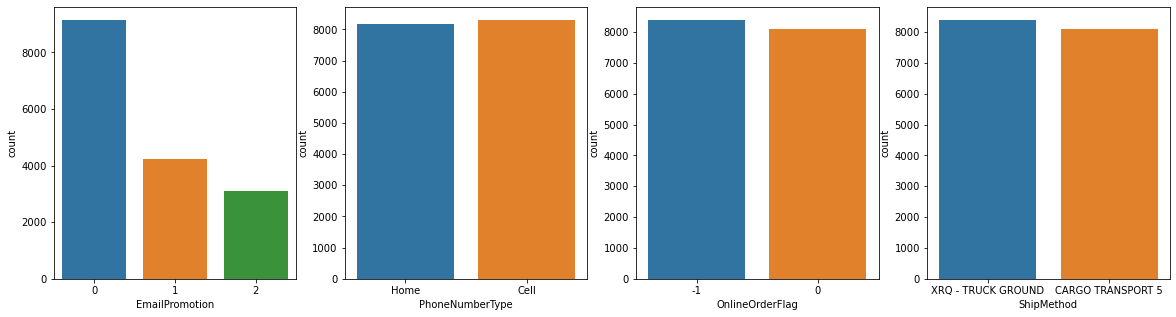

In [5]:
f, ax = plt.subplots(2,4,figsize=(20,5))
sns.countplot(x=data['EmailPromotion'], ax=ax[0,0])
sns.countplot(x=data['PhoneNumberType'], ax=ax[0,1])
sns.countplot(x=data['OnlineOrderFlag'], ax=ax[0,2])
sns.countplot(x=data['ShipMethod'], ax=ax[0,3])
sns.countplot(x=data['EmailPromotion'], ax=ax[1,0])
sns.countplot(x=data['PhoneNumberType'], ax=ax[1,1])
sns.countplot(x=data['OnlineOrderFlag'], ax=ax[1,2])
sns.countplot(x=data['ShipMethod'], ax=ax[1,3])

plt.show()

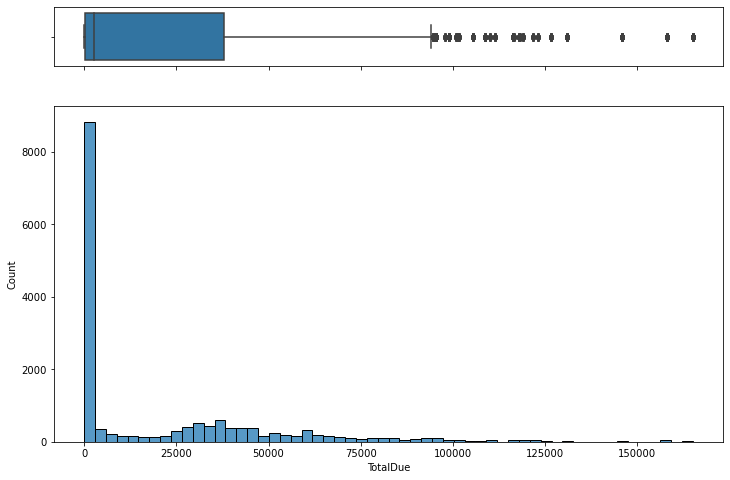

In [6]:
f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,8))
sns.boxplot(x=data['TotalDue'], ax=ax[0])
sns.histplot(x=data['TotalDue'], ax=ax[1])
 
# Remove x axis name for the boxplot
ax[0].set(xlabel='')
plt.show()

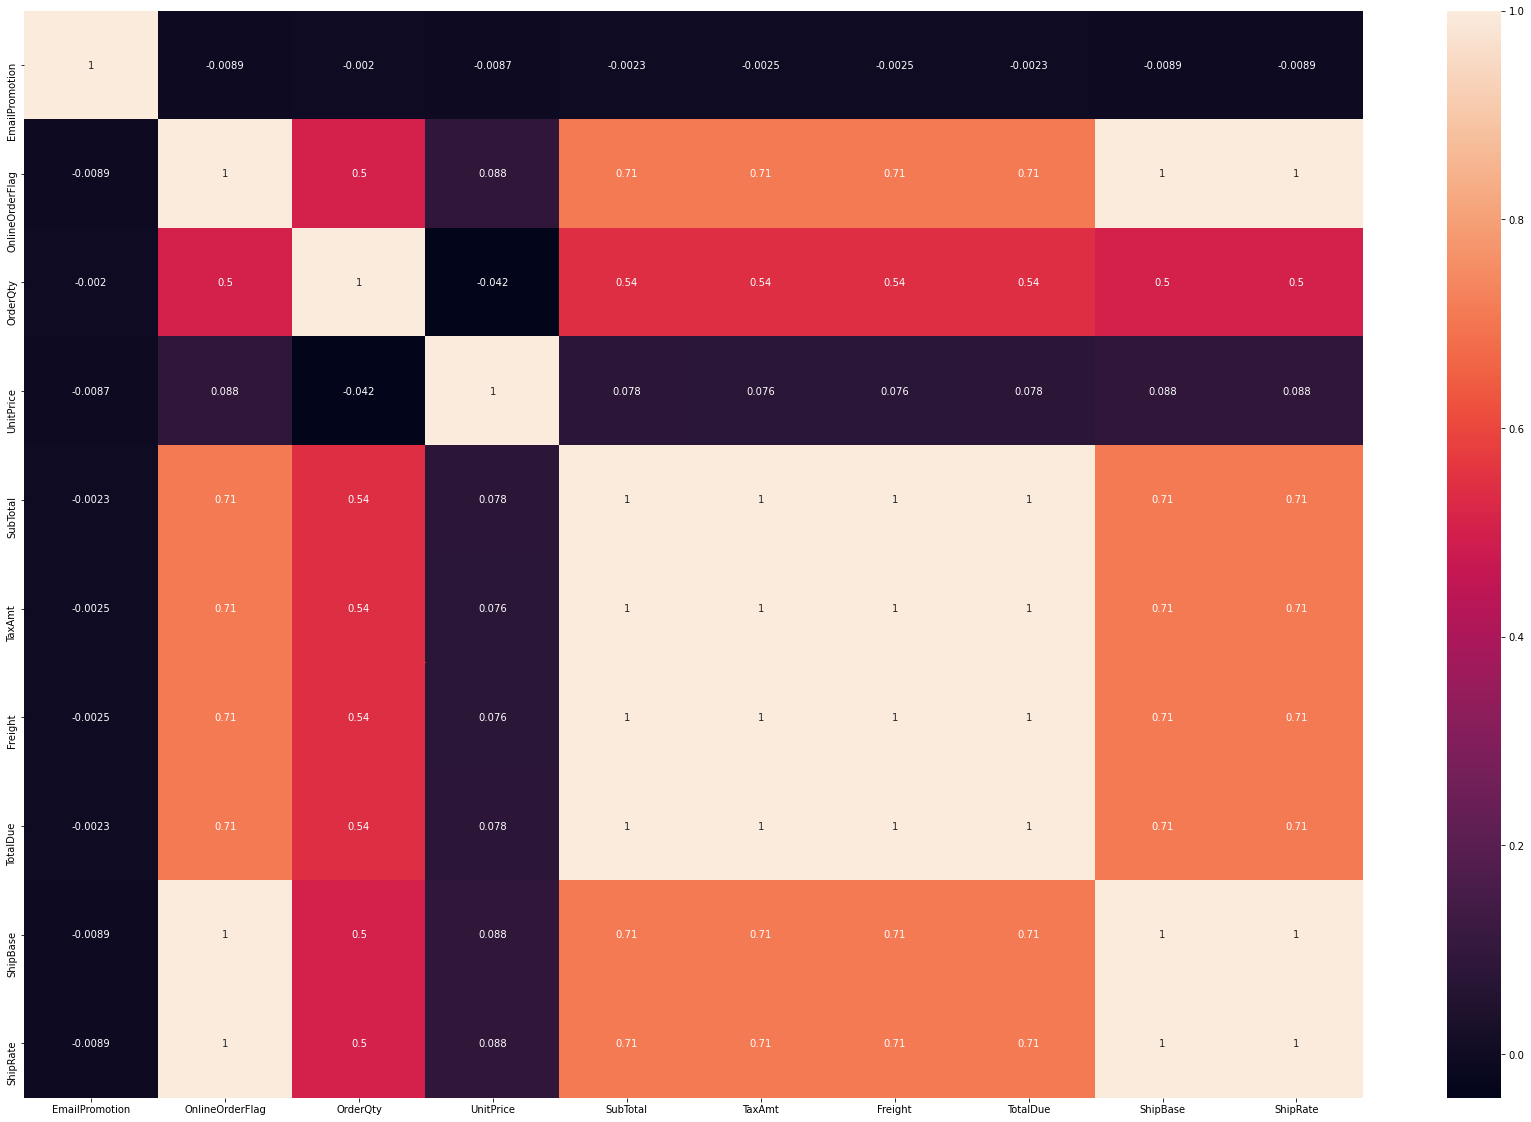

In [7]:
f, ax = plt.subplots(1,1,figsize=(30,20))
coef = data.corr(method='pearson')
sns.heatmap(coef, annot=True)
plt.show()